In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_dir = r"C:\Users\Soft\Desktop\Py\Docs\Covid19-dataset\train"
test_dir = r"C:\Users\Soft\Desktop\Py\Docs\Covid19-dataset\test"

In [3]:
width, height = 500, 500

In [4]:
train_generator = ImageDataGenerator(
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    rescale=1.0/255
)

In [5]:
test_generator = ImageDataGenerator(rescale=1.0/255)

In [6]:
train_data = train_generator.flow_from_directory(
    train_dir,
    target_size=(500, 500),
    class_mode='categorical',
    batch_size=32,
)

Found 251 images belonging to 3 classes.


In [7]:
test_data = test_generator.flow_from_directory(
    test_dir,
    target_size=(500, 500),
    class_mode='categorical',
    batch_size=32,
)

Found 66 images belonging to 3 classes.


In [8]:
train_data.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(500, 500, 3)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPool2D((2, 2)),
    Conv2D(256, (3, 3), activation="relu"),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(50, activation="relu"),
    Dense(32, activation="relu"),
    Dense(10, activation="relu"),
    Dense(3, activation="softmax")
])

In [12]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [14]:
history = model.fit(train_data, epochs=20, batch_size=32, validation_data=test_data)

Epoch 1/20
8/8 [==============================] - 69s 8s/step - loss: 1.2829 - accuracy: 0.4422 - val_loss: 1.0875 - val_accuracy: 0.3939
Epoch 2/20
8/8 [==============================] - 68s 8s/step - loss: 1.0623 - accuracy: 0.4622 - val_loss: 1.0092 - val_accuracy: 0.4091
Epoch 3/20
8/8 [==============================] - 67s 8s/step - loss: 0.8893 - accuracy: 0.5817 - val_loss: 0.6351 - val_accuracy: 0.6061
Epoch 4/20
8/8 [==============================] - 66s 8s/step - loss: 0.9329 - accuracy: 0.6016 - val_loss: 1.0922 - val_accuracy: 0.3030
Epoch 5/20
8/8 [==============================] - 66s 8s/step - loss: 0.7222 - accuracy: 0.6733 - val_loss: 0.8056 - val_accuracy: 0.6364
Epoch 6/20
8/8 [==============================] - 67s 8s/step - loss: 0.6456 - accuracy: 0.7052 - val_loss: 0.7592 - val_accuracy: 0.6667
Epoch 7/20
8/8 [==============================] - 66s 8s/step - loss: 0.5133 - accuracy: 0.8048 - val_loss: 0.7204 - val_accuracy: 0.6970
Epoch 8/20
8/8 [==================

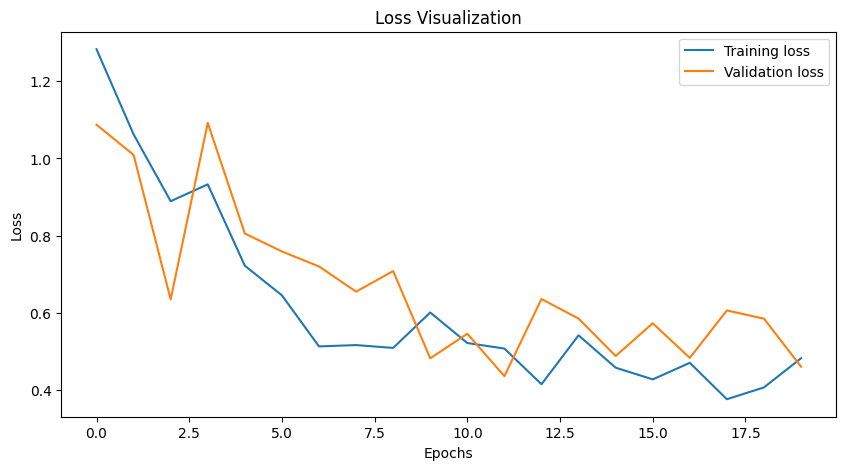

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Visualization")
plt.legend()
plt.show()

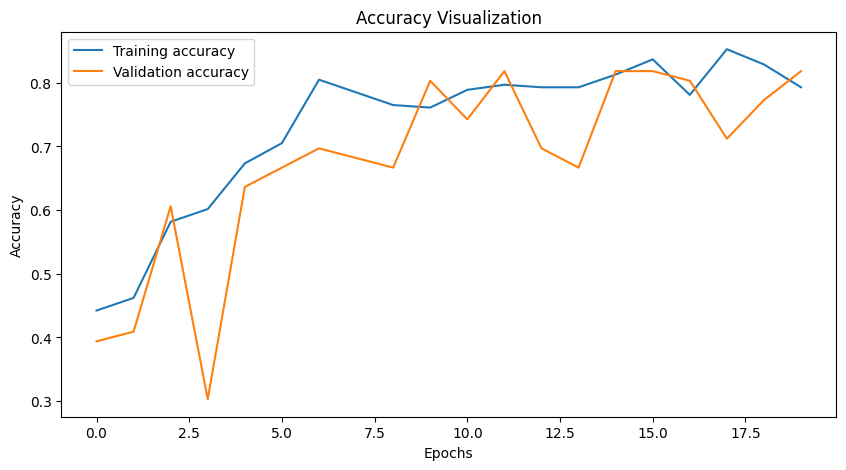

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Visualization")
plt.legend()
plt.show()

In [21]:
classes = {v:k for k, v in train_data.class_indices.items()}

In [22]:
classes

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}

In [24]:
test_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
y_pred = np.argmax(model.predict(test_data), axis=1)

3/3 [==============================] - 3s 729ms/step


In [33]:
y_pred

array([2, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0,
       2, 1, 0, 2, 2, 1, 0, 1, 2, 1, 0, 0, 2, 0, 0, 1, 0, 2, 0, 2, 1, 1,
       0, 0, 1, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 0, 2, 2, 2, 0, 2, 0, 1, 1],
      dtype=int64)

In [34]:
accuracy_score(test_data.classes, y_pred)

0.36363636363636365

In [37]:
def make_predictions(img_path):
    img = load_img(img_path, target_size=(500, 500))
    img_arr = img_to_array(img)
    norm = img_arr / 255.0
    flatten = np.expand_dims(norm, axis=0)
    pred = model.predict(flatten)[0]
    pred_class = classes[np.argmax(pred)]
    return pred_class

In [38]:
make_predictions(r"C:\Users\Soft\Desktop\Py\Docs\Covid19-dataset\test\Normal\0117.jpeg")

1/1 [==============================] - 0s 186ms/step


'Normal'

In [40]:
make_predictions(r"C:\Users\Soft\Desktop\Py\Docs\Covid19-dataset\test\Covid\0123.jpeg")

1/1 [==============================] - 0s 75ms/step


'Covid'

In [41]:
make_predictions(r"C:\Users\Soft\Desktop\Py\Docs\Covid19-dataset\test\Viral Pneumonia\0118.jpeg")

1/1 [==============================] - 0s 66ms/step


'Normal'

In [42]:
make_predictions(r"C:\Users\Soft\Desktop\Py\Docs\Covid19-dataset\test\Viral Pneumonia\0109.jpeg")

1/1 [==============================] - 0s 134ms/step


'Normal'